##1.1 **Importing & Cleaning time-series data**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# load time series dataset
df_power = pd.read_csv("https://drive.google.com/uc?id=1Q9Dov5mzhb-ZNyj9mr-H_oSljX6MD7Pb")
df_power.columns


Index(['Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

In [ ]:
df_power.tail(10)

,Date,Consumption,Wind,Solar,Wind+Solar
4373,2017-12-22,1423.23782,228.773,10.065,238.838
4374,2017-12-23,1272.17085,748.074,8.450,756.524
4375,2017-12-24,1141.75730,812.422,9.949,822.371
4376,2017-12-25,1111.28338,587.810,15.765,603.575
4377,2017-12-26,1130.11683,717.453,30.923,748.376
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


Clearly we have records of all type of power consumption by 2017.

In [ ]:
df_power.shape


(4383, 5)

In [ ]:
df_power.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [ ]:
#convert object to datetime format
df_power['Date'] = pd.to_datetime(df_power['Date'])

In [ ]:
df_power.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

Now that the Date column is in correct datatype, let’s set it as the DataFrame’s index because in time series analysis the index column is always datetime column.

In [ ]:
df_power = df_power.set_index('Date')
df_power.tail(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


In [ ]:
df_power.index


DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [ ]:
# Add columns with year, month, and weekday name
df_power['Year'] = df_power.index.year
df_power['Month'] = df_power.index.month
df_power['Weekday Name'] = df_power.index.day_name()

In [ ]:
# Display a random sampling of 5 rows
df_power.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


In [ ]:
df_power.loc['2015-10-02']

Consumption     1391.05
Wind             81.229
Solar           160.641
Wind+Solar       241.87
Year               2015
Month                10
Weekday Name     Friday
Name: 2015-10-02 00:00:00, dtype: object

In [ ]:
df_power.loc['2017-01-01':'2017-12-30']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2017-01-01,1130.41300,307.125,35.291,342.416,2017,1,Sunday
2017-01-02,1441.05200,295.099,12.479,307.578,2017,1,Monday
2017-01-03,1529.99000,666.173,9.351,675.524,2017,1,Tuesday
2017-01-04,1553.08300,686.578,12.814,699.392,2017,1,Wednesday
2017-01-05,1547.23800,261.758,20.797,282.555,2017,1,Thursday
...,...,...,...,...,...,...,...
2017-12-26,1130.11683,717.453,30.923,748.376,2017,12,Tuesday
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday


##1.2 **Visualization for time series analysis**



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(16, 4)})
plt.rcParams['figure.dpi'] = 150

Let’s create a line plot of the full time series of Germany’s daily electricity consumption, using the pandas's plot() method.

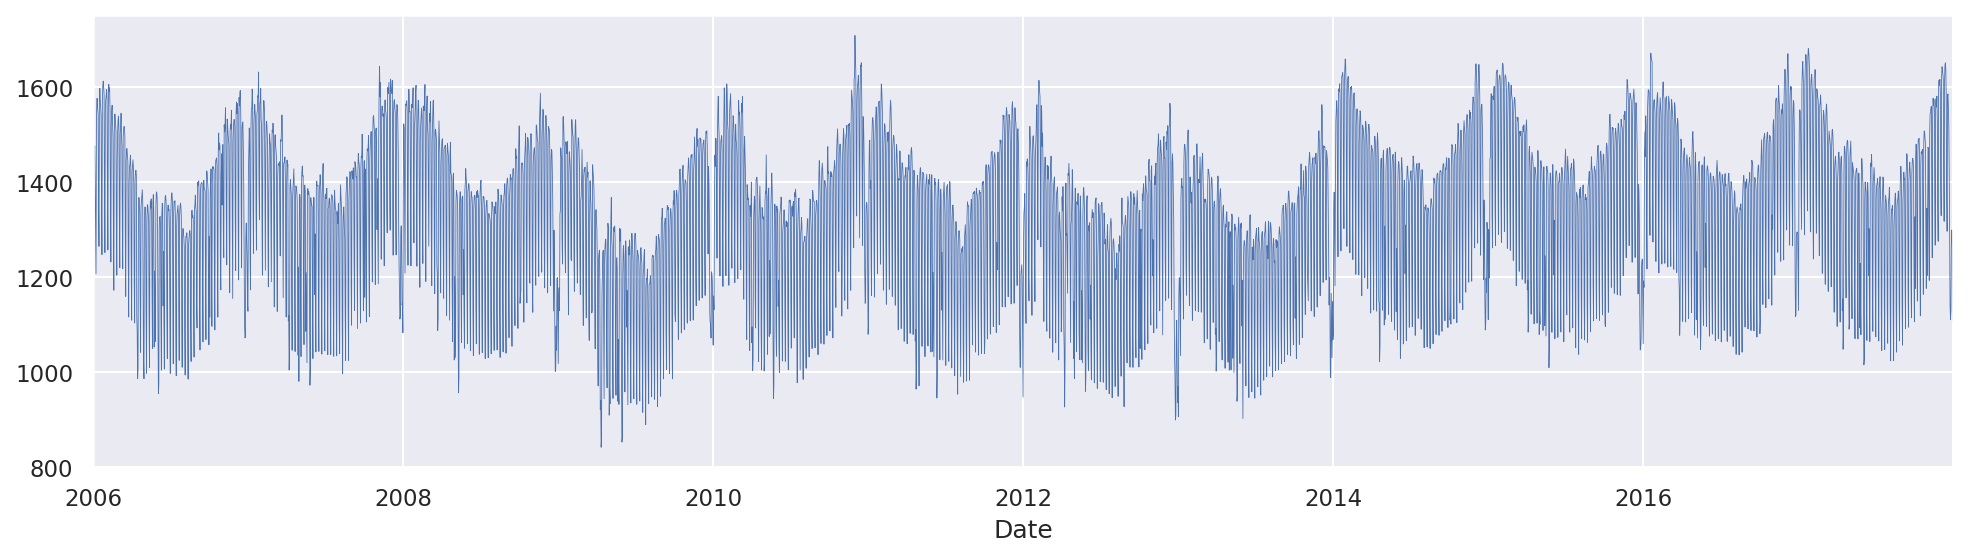

In [ ]:
df_power['Consumption'].plot(linewidth=0.4)

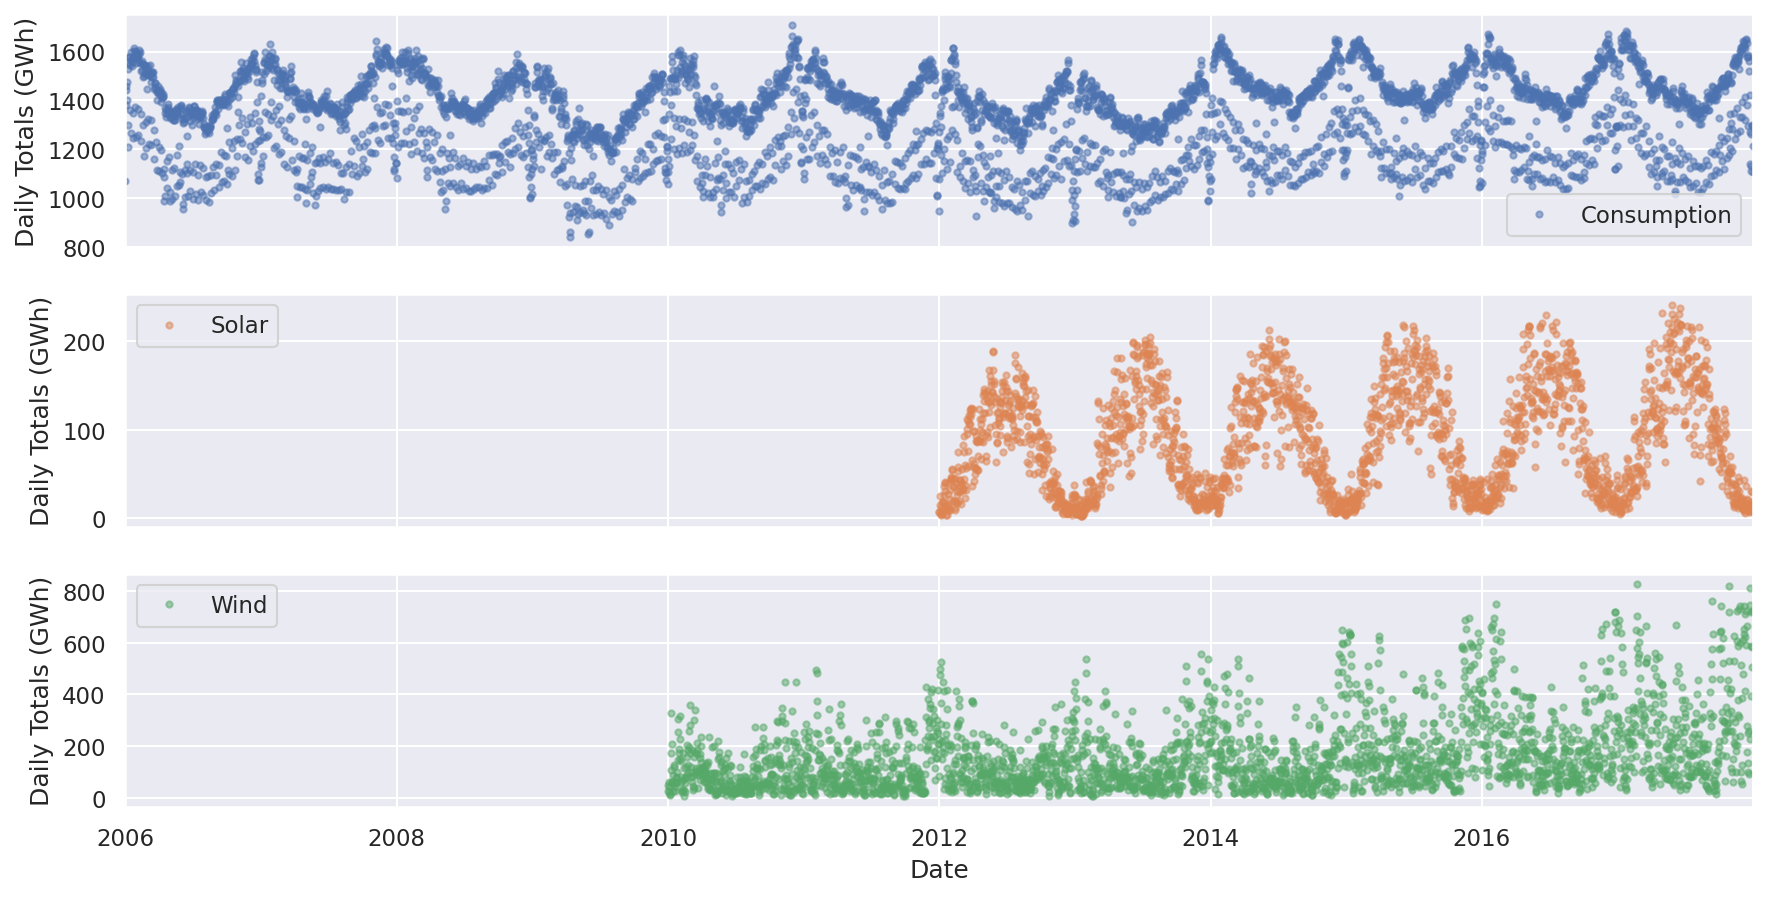

In [ ]:
cols_to_plot = ['Consumption', 'Solar', 'Wind']
axes = df_power[cols_to_plot].plot(marker='.', alpha=0.5, linestyle='None',figsize=(14, 7), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

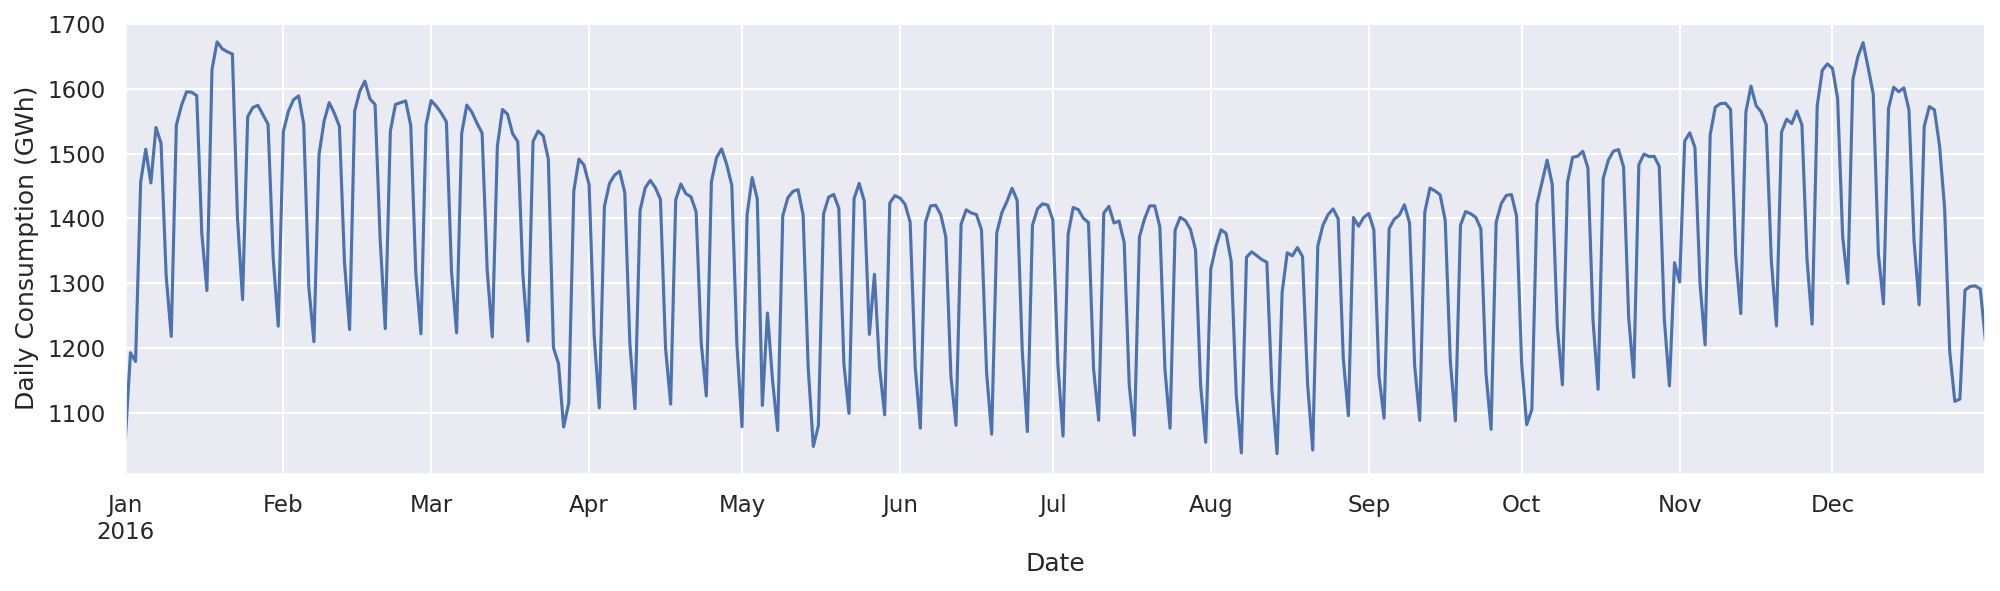

In [ ]:
ax = df_power.loc['2016', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');


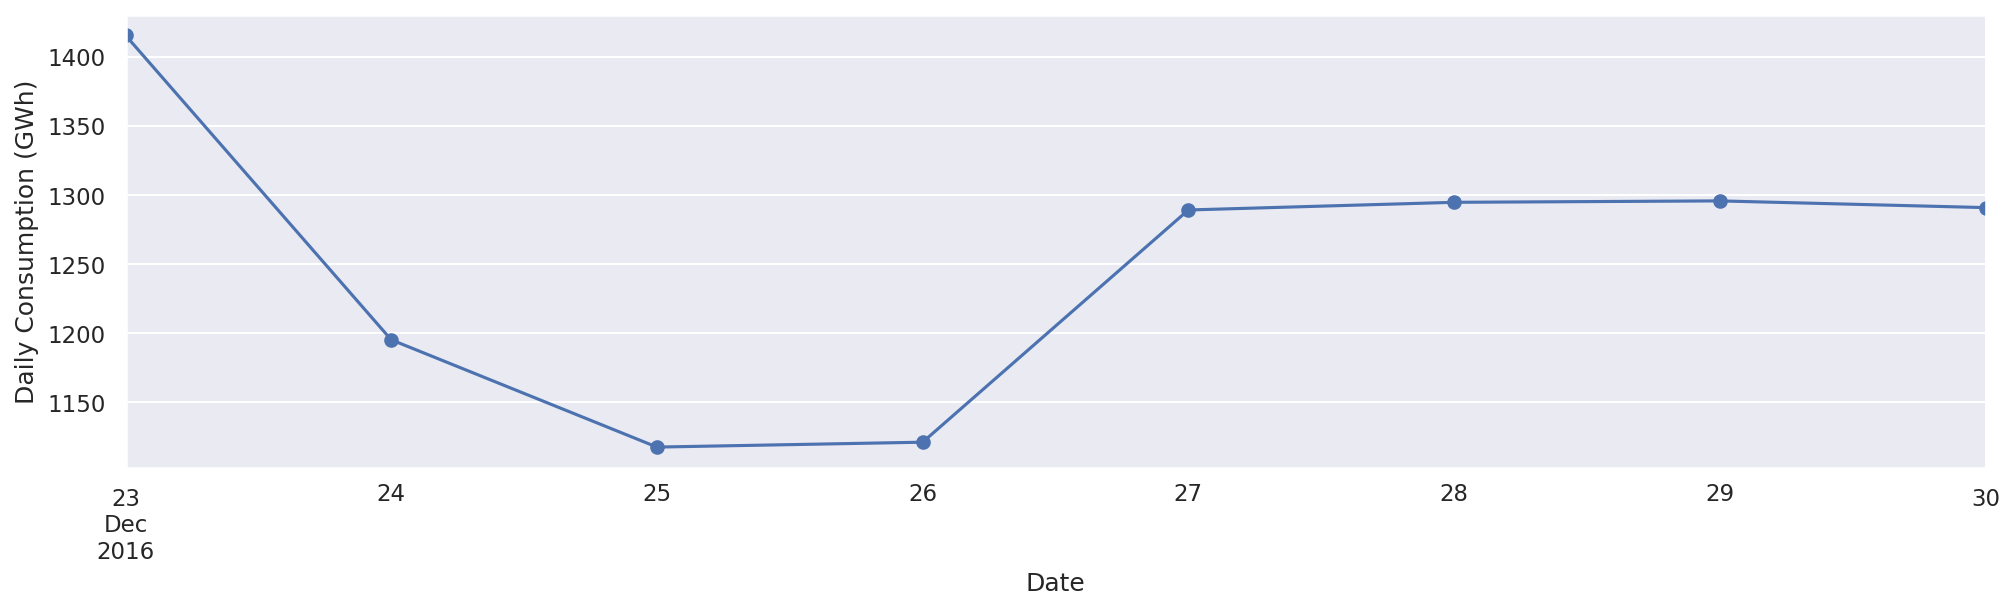

In [ ]:
ax = df_power.loc['2016-12-23':'2016-12-30', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');


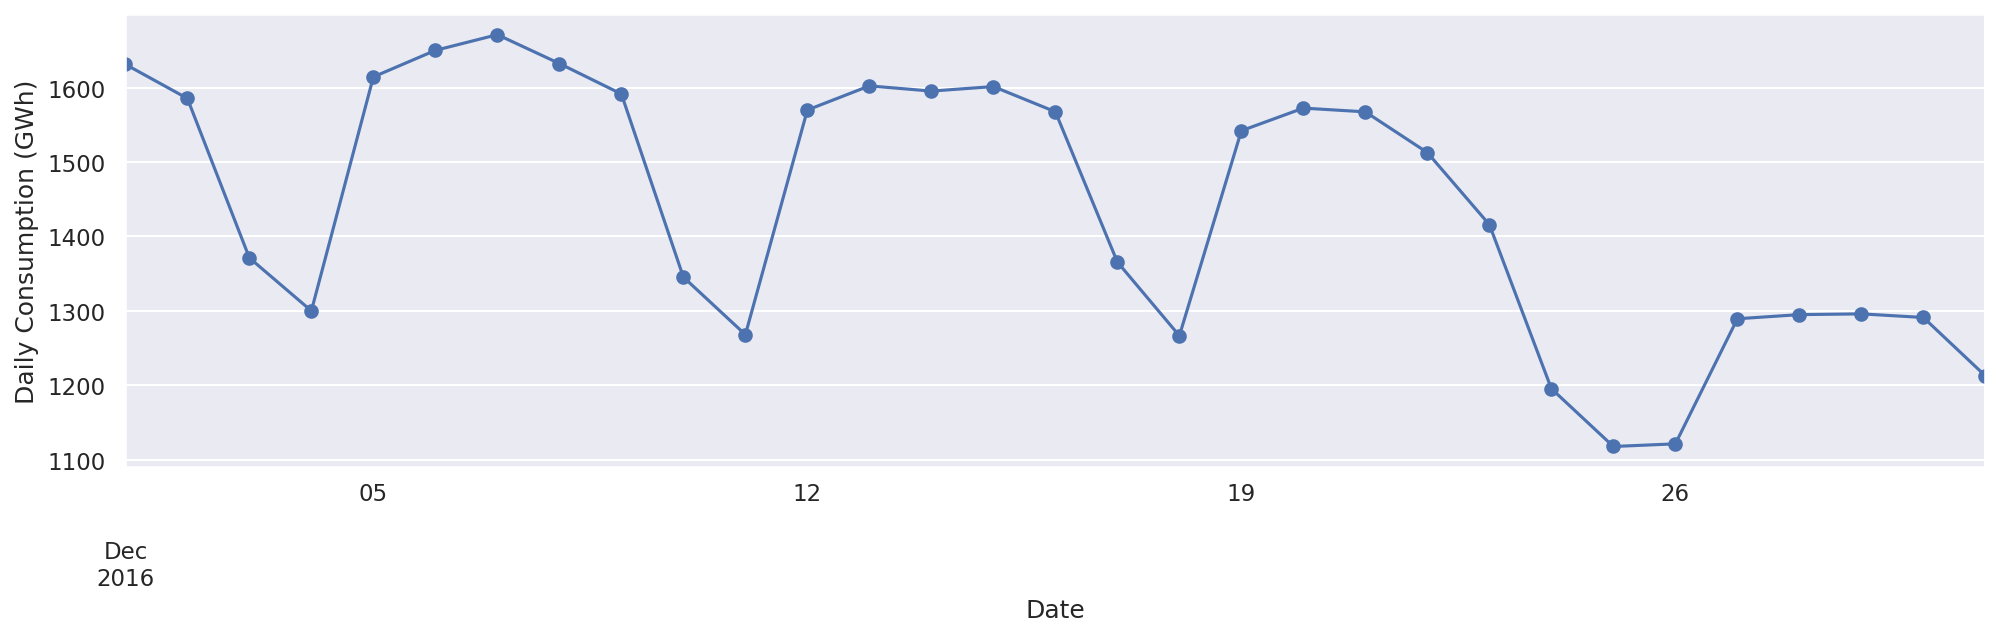

In [ ]:
ax = df_power.loc['2016-12', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');


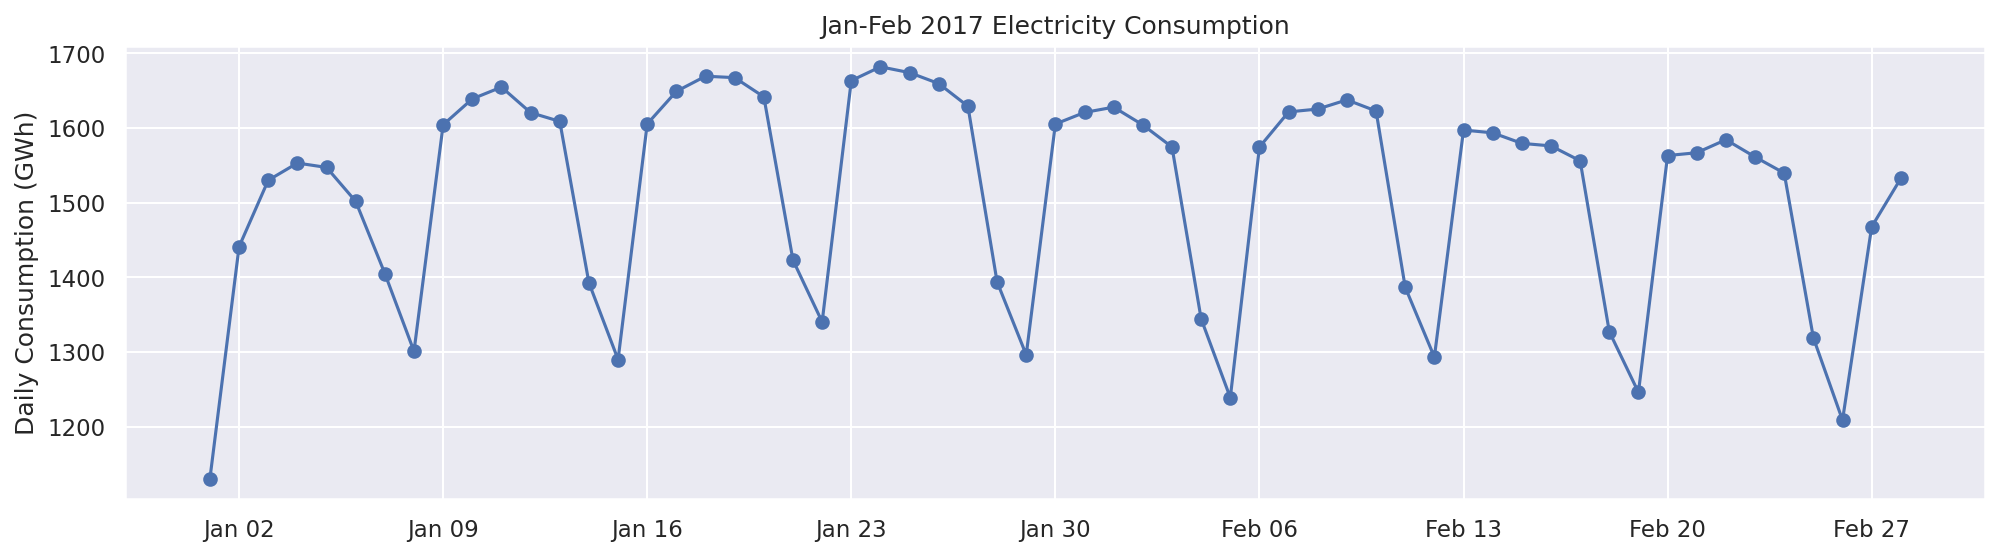

In [ ]:

# import dates module from matplotlib 
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
# plot graph
fig, ax = plt.subplots()

ax.plot(df_power.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')

# to set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# to set format for x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

#1.3 Seasonality

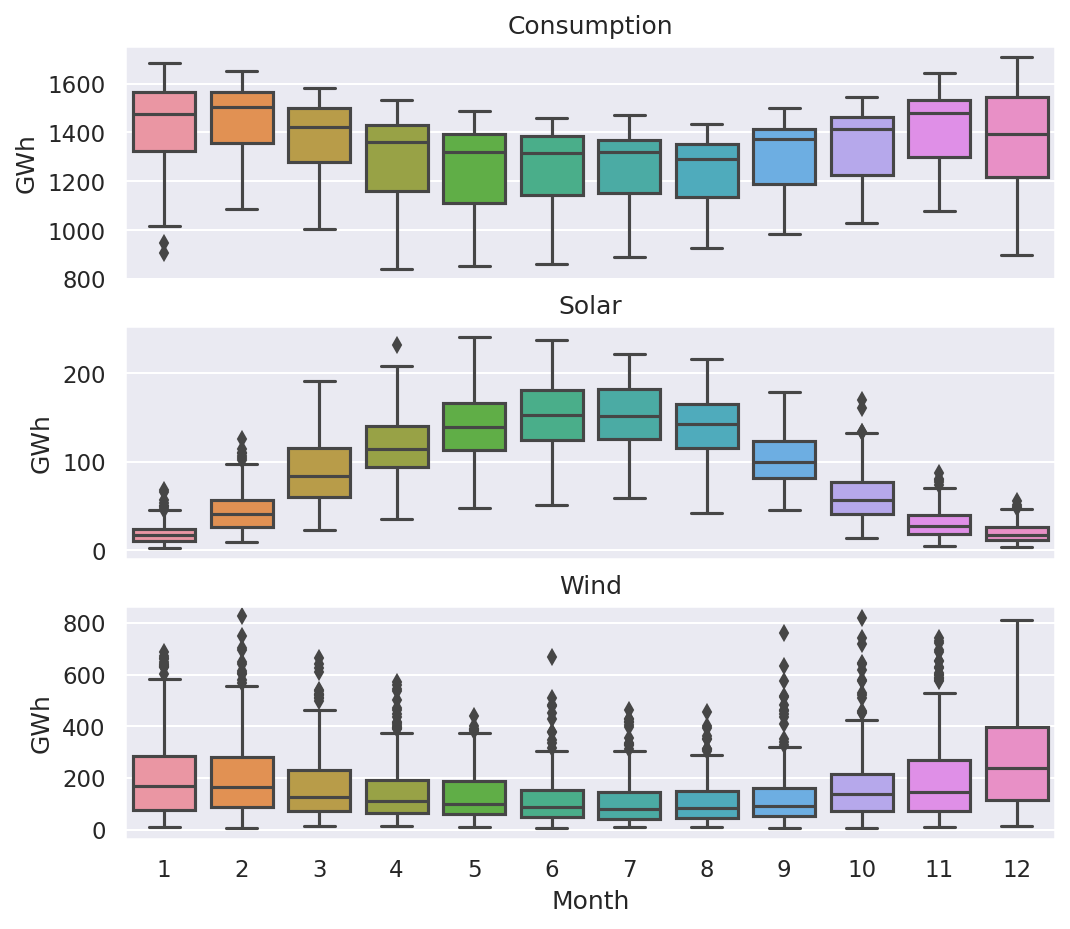

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(8, 7), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
  sns.boxplot(data=df_power, x='Month', y=name, ax=ax)
  ax.set_ylabel('GWh')
  ax.set_title(name)
  if ax != axes[-1]:
    ax.set_xlabel('')  


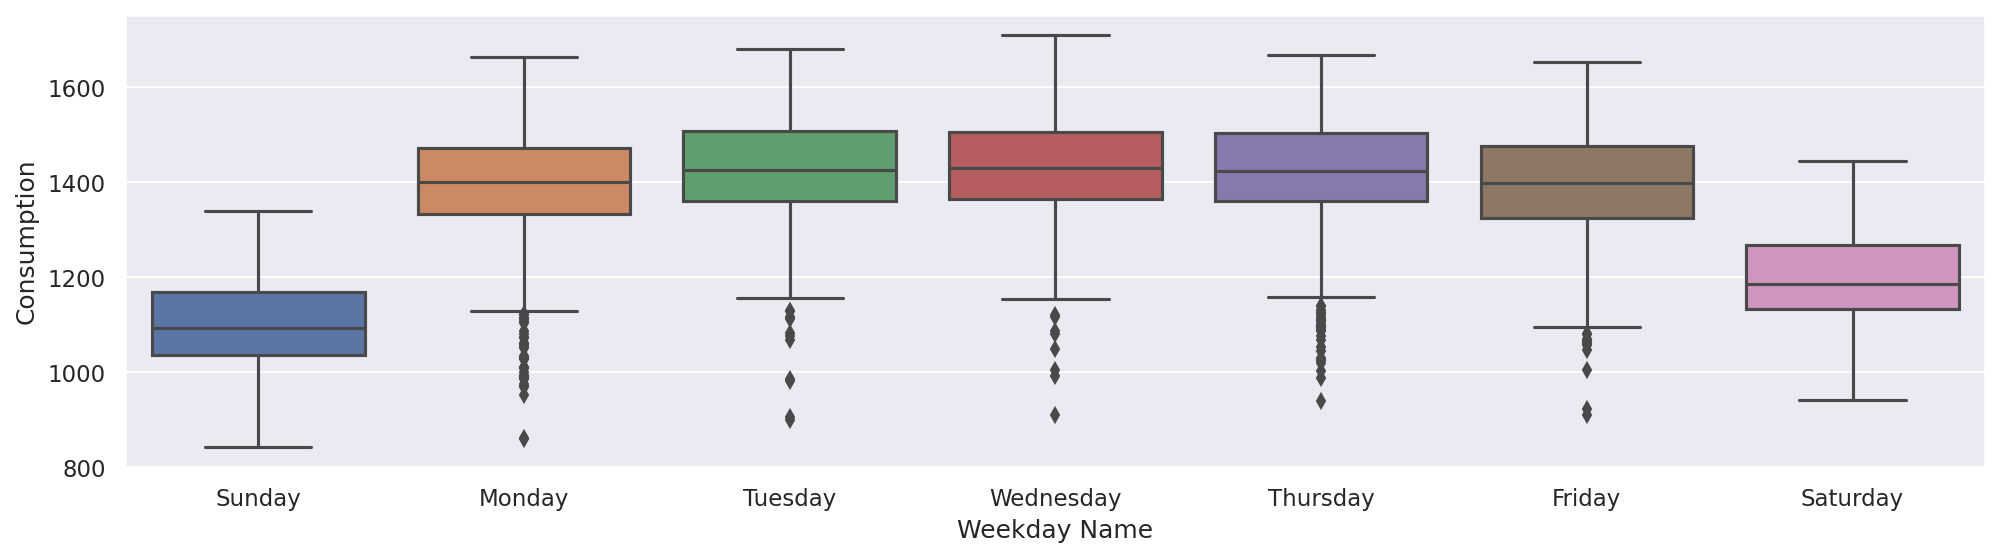

In [ ]:
sns.boxplot(data=df_power, x='Weekday Name', y='Consumption');


In [ ]:
df_power.columns

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar', 'Year', 'Month',
       'Weekday Name'],
      dtype='object')

In [ ]:
columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']

power_weekly_mean = df_power[columns].resample('W').mean()
power_weekly_mean.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
2006-02-05,1501.403286,NaN,NaN,NaN
2006-02-12,1498.217143,NaN,NaN,NaN
2006-02-19,1446.507429,NaN,NaN,NaN
2006-02-26,1447.651429,NaN,NaN,NaN


In [ ]:
start, end = '2016-01', '2016-06'


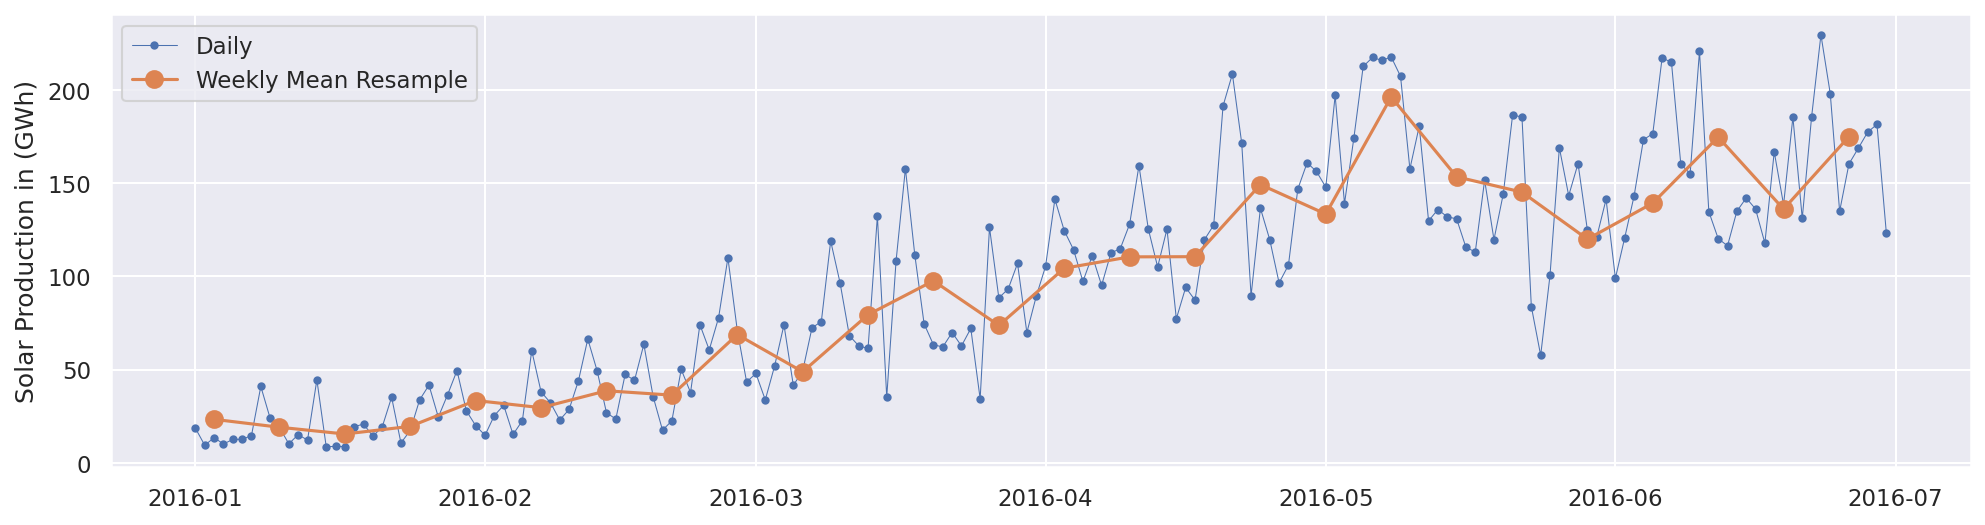

In [ ]:
fig, ax = plt.subplots()

ax.plot(df_power.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(power_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production in (GWh)')
ax.legend();

#1.5 Smoothening

Smoothening of a time series may be useful in:

* Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.
* The smoothed version of series can be used as a feature to explain the original series itself.
* Visualize the underlying trend better

Moving average is nothing but the average of a rolling window of defined width. But you must choose the window-width wisely, because, large window-size will over-smooth the series. For example, a window-size equal to the seasonal duration (ex: 12 for a month-wise series), will effectively nullify the seasonal effect.

LOESS, short for ‘LOcalized regrESSion’ fits multiple regressions in the local neighborhood of each point. It is implemented in the statsmodels package, where you can control the degree of smoothing using frac argument which specifies the percentage of data points nearby that should be considered to fit a regression model.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


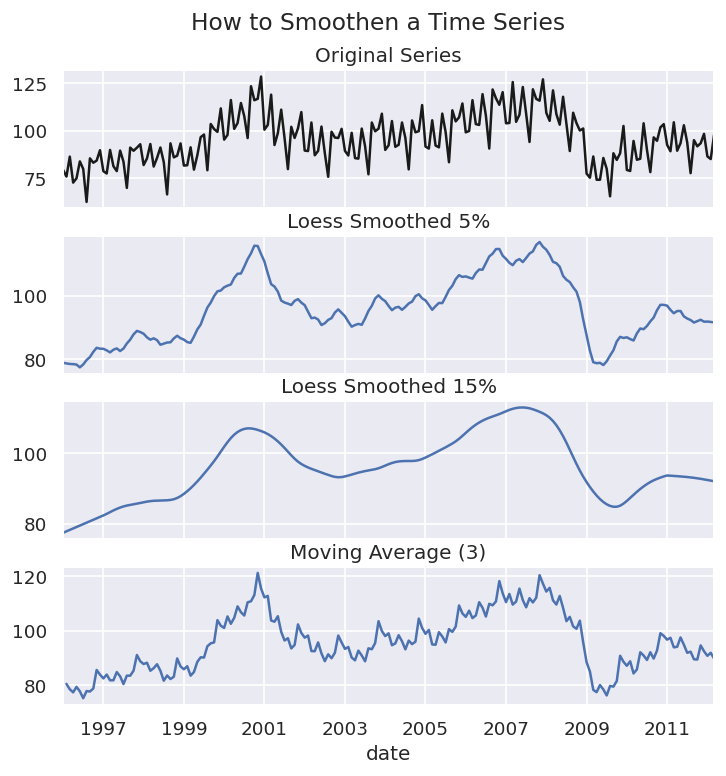

In [ ]:


from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/elecequip.csv', parse_dates=['date'], index_col='date')

# 1. Moving Average
df_ma = df_orig.value.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.05)[:, 1], index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.15)[:, 1], index=df_orig.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

#1.4 Exercises

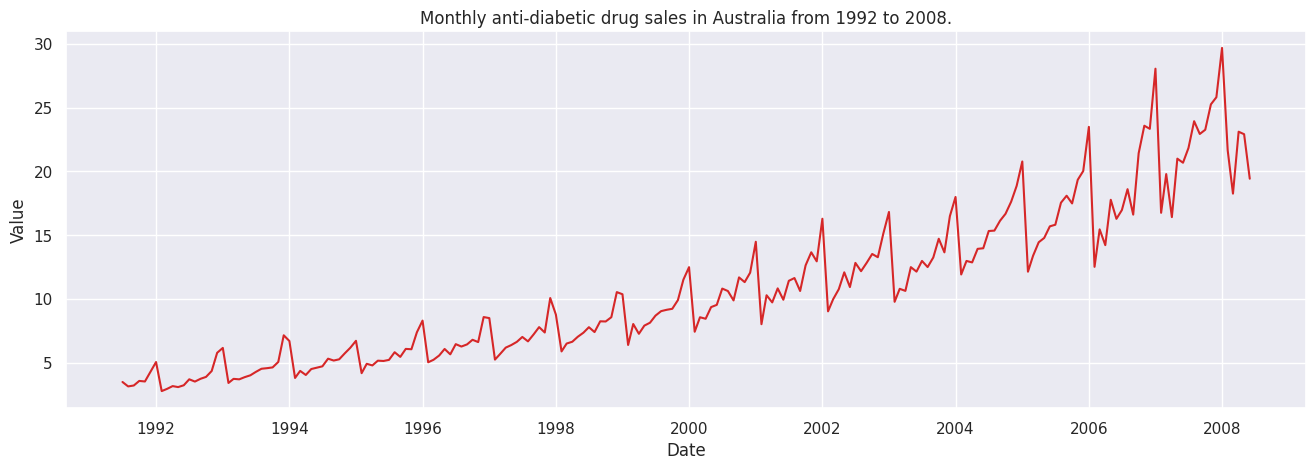

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.') 

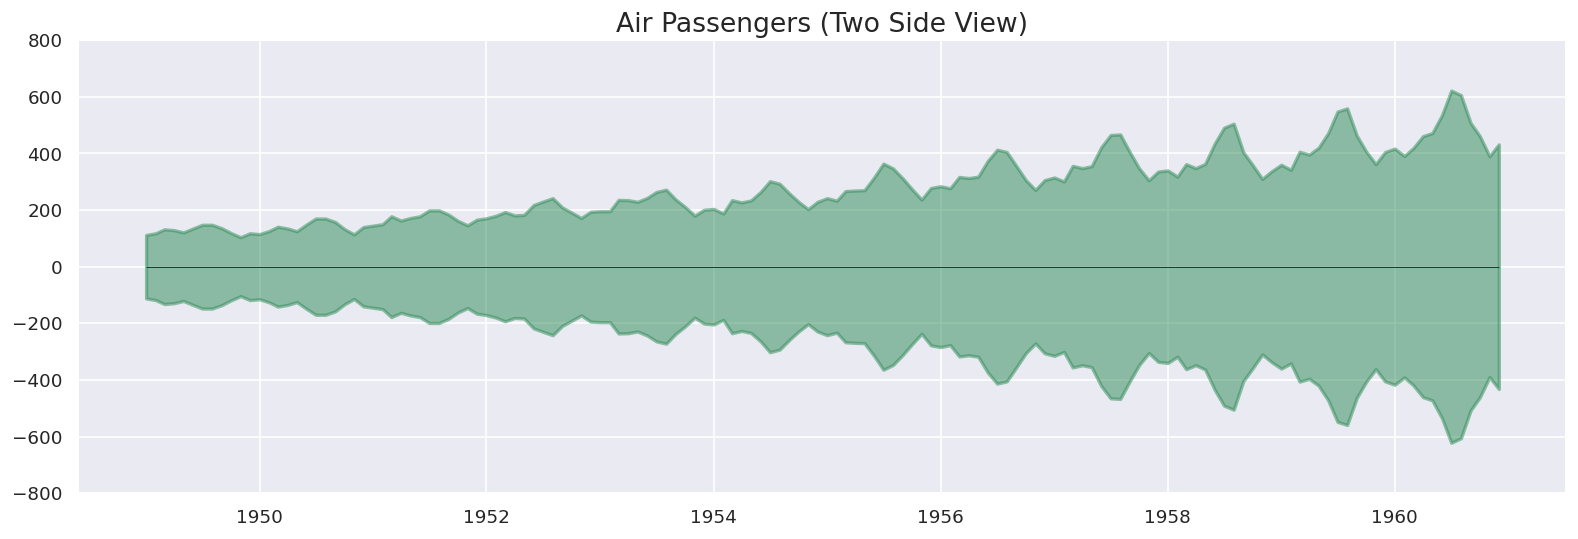

In [ ]:
import numpy as np
# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'])
x = df['date'].values
y1 = df['value'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.title('Air Passengers (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(df.date), xmax=np.max(df.date), linewidth=.5)
plt.show()

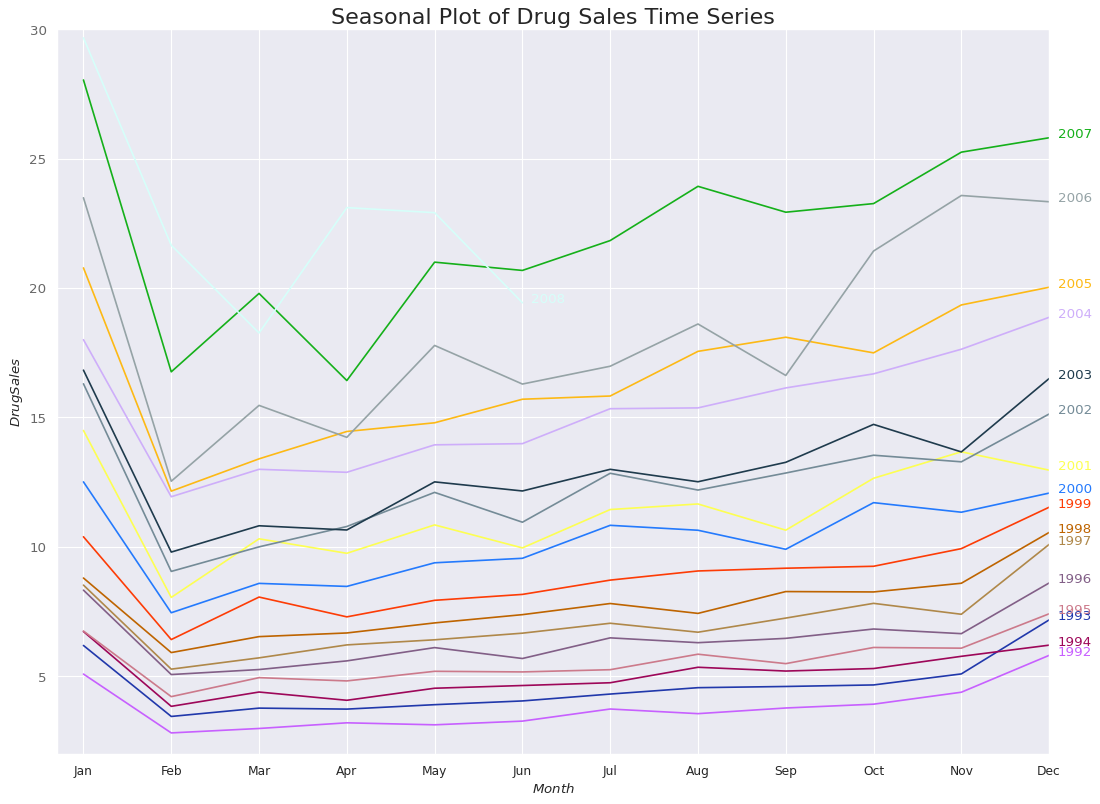

In [ ]:
import matplotlib as mpl
# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

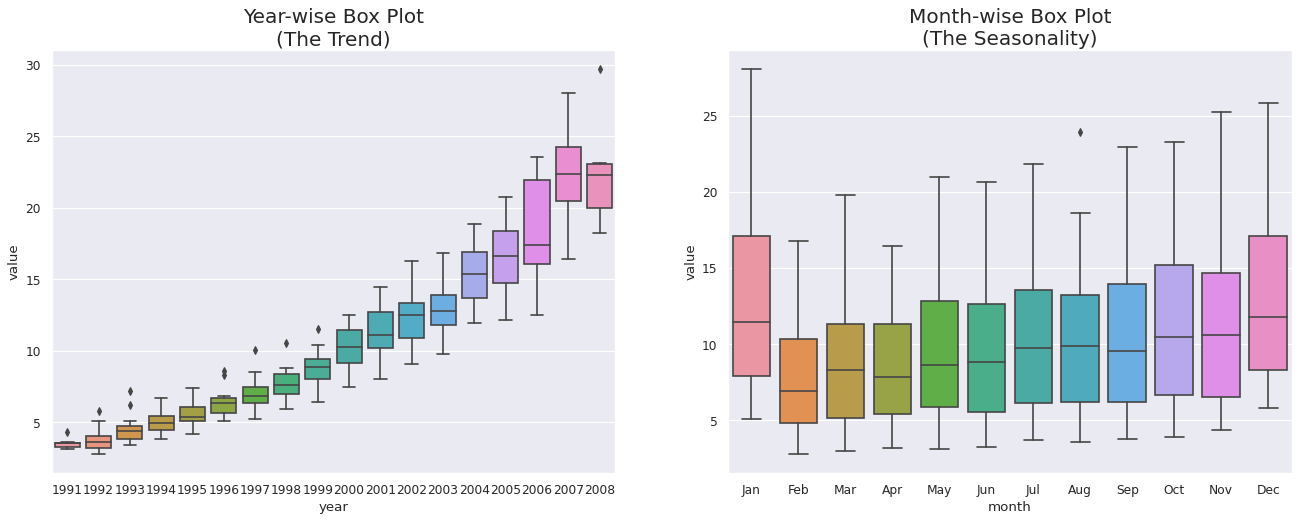

In [ ]:
# Import Data
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

Sometimes, your time series will have missing dates/times. That means, the data was not captured or was not available for those periods. It could so happen the measurement was zero on those days, in which case, case you may fill up those periods with zero.

Secondly, when it comes to time series, you should typically NOT replace missing values with the mean of the series, especially if the series is not stationary. What you could do instead for a quick and dirty workaround is to forward-fill the previous value.

However, depending on the nature of the series, you want to try out multiple approaches before concluding. Some effective alternatives to imputation are:

Backward Fill
Linear Interpolation
Quadratic interpolation
Mean of nearest neighbors
Mean of seasonal couterparts


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: RuntimeWarning: Mean of empty slice


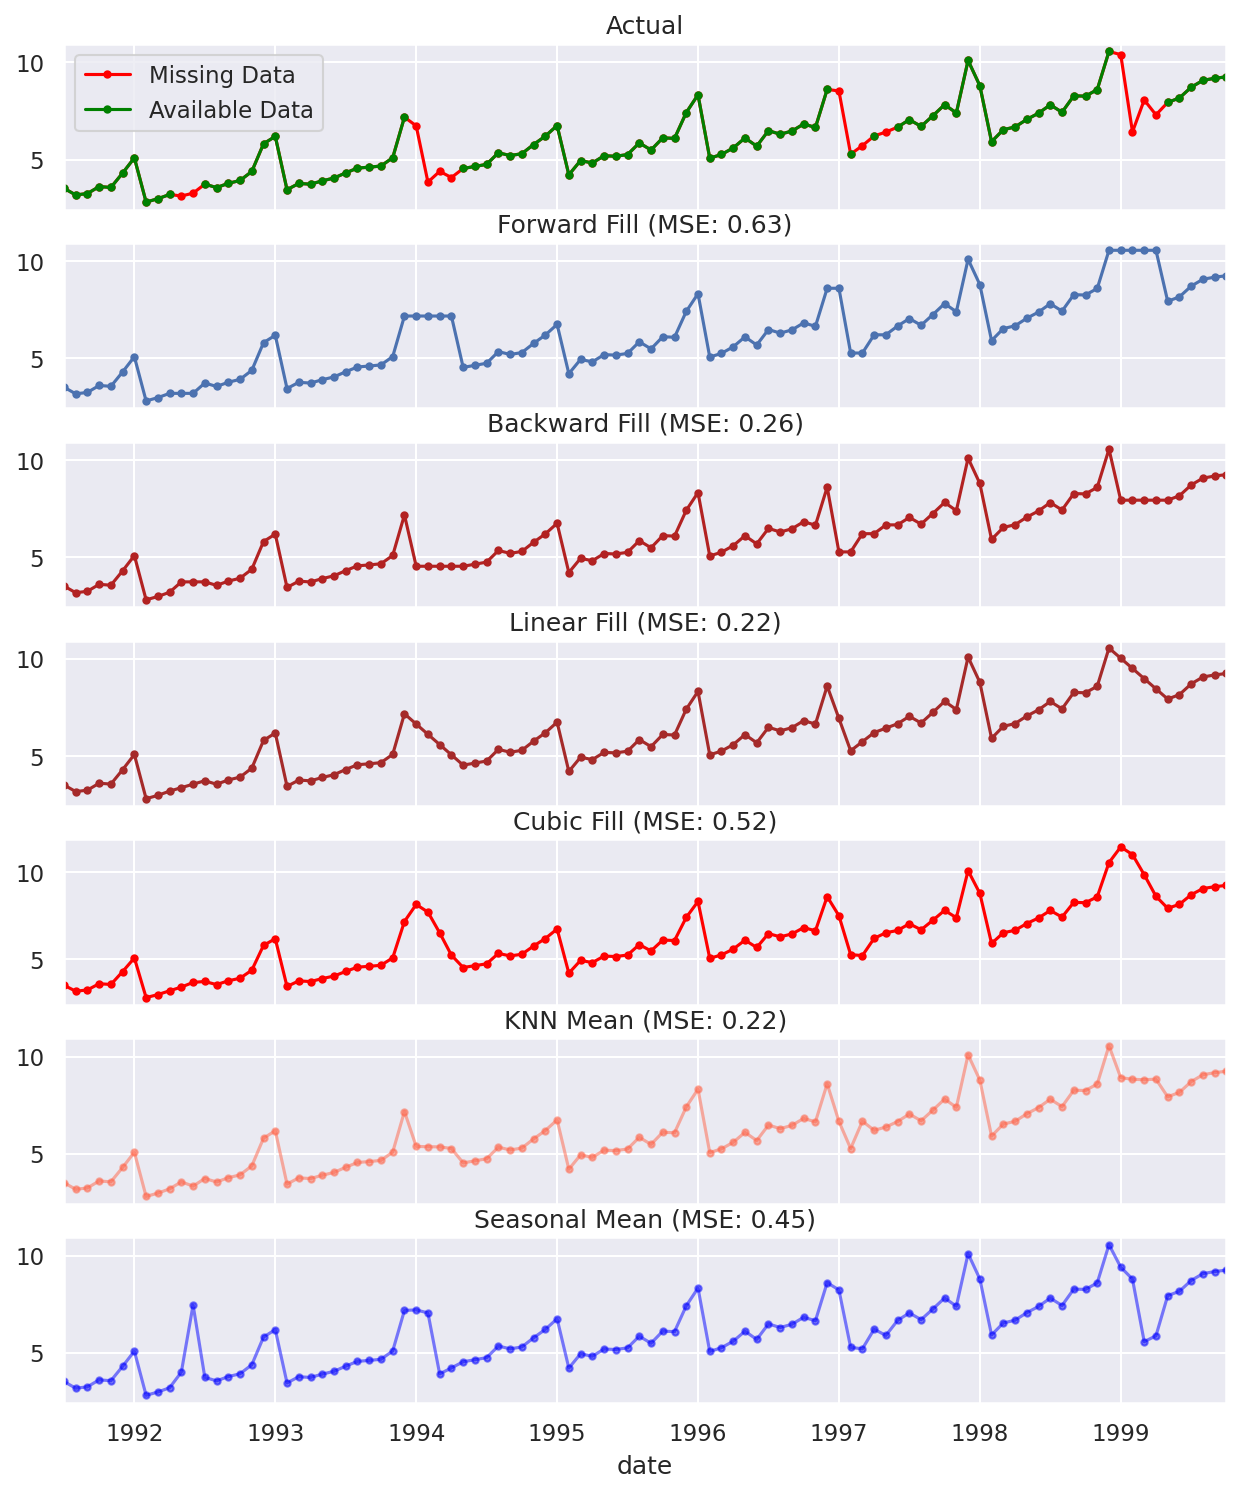

In [ ]:
# # Generate dataset
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
df_orig = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date').head(100)
df = pd.read_csv('a10_missings.csv', parse_dates=['date'], index_col='date')

fig, axes = plt.subplots(7, 1, sharex=True, figsize=(10, 12))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. Forward Fill --------------------------
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")

## 3. Backward Fill -------------------------
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='firebrick', style=".-")

## 4. Linear Interpolation ------------------
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset = ['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', color='brown', style=".-")

## 5. Cubic Interpolation --------------------
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='red', style=".-")

# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

## 6. Mean of 'n' Nearest Past Neighbors ------
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

df['knn_mean'] = knn_mean(df.value.values, 8)
error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)
df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[5], label='KNN Mean', color='tomato', alpha=0.5, style=".-")

## 7. Seasonal Mean ----------------------------
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = np.round(mean_squared_error(df_orig['value'], df['seasonal_mean']), 2)
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", ax=axes[6], label='Seasonal Mean', color='blue', alpha=0.5, style=".-")

# Time_Series_Analysis:
A time series is a collection of observations made sequentially in time. Note that there are two important key phrases here—a collection of observations and sequentially in time. Since it is a series, it has to be a collection of observations, and since it deals with time, it has to deal with it in a sequential fashion


## Exercise 1
(a)- How do you import the dataset with the help of the python package and which package will you use?

(b)- Import all librearies which are necessary for Time Series Data Set?

(c)- Load the DataSet with the help of pandas-Datareader?


In [ ]:
# Write your code
!pip install pandas-Datareader
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
df_tesla = pd.read_csv("/content/TSLA (1).csv")
df_tesla.head()
df_tesla.set_index("Date",drop=True,inplace = True)
df_tesla.head()
## df_tesla = pdr.get_data_yahoo("TSLA")

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


### set_index- Set the DataFrame index (row labels) using one or more existing columns or arrays (of the correct length). The index can replace the existing index or expand on it.

## Exercise 2
(a)- Plot with High column and see what is trend behaviour?


Index(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02', '2010-07-06',
       '2010-07-07', '2010-07-08', '2010-07-09', '2010-07-12', '2010-07-13',
       ...
       '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-27',
       '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-03'],
      dtype='object', name='Date', length=2416)

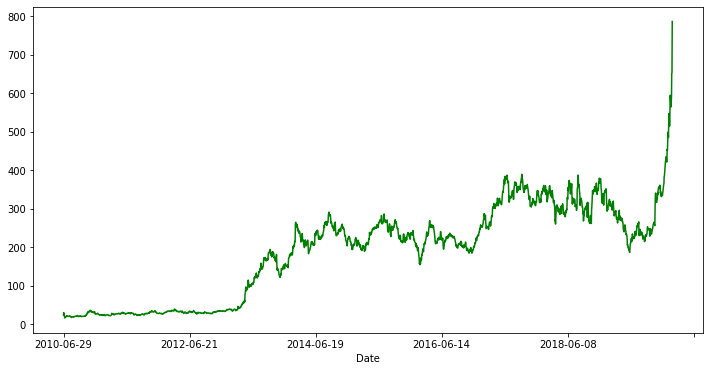

In [ ]:
# Write your code
df_tesla["High"].plot(figsize=(12,6),ls = "-",c="g")
df_tesla.index

In [ ]:
# Write your code
df_tesla.index

Index(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02', '2010-07-06',
       '2010-07-07', '2010-07-08', '2010-07-09', '2010-07-12', '2010-07-13',
       ...
       '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-27',
       '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-03'],
      dtype='object', name='Date', length=2416)

## Exercise 3 
(a)-  How do I read first four rows using locate function?

In [ ]:
# Write your code
index = df_tesla.loc["02-01-2013":"02-01-2014"].index
share_open = df_tesla.loc["02-01-2013":"02-01-2014"]["Open"]
share_open.head()

,Date,Open,High,Low,Close,Adj Close,Volume
202,29-01-2018,67.970001,70.169998,67.655998,69.905998,69.905998,23735500


## Exercise 4--
###(a)- Plot the graph index with share_open and analyze the trend of TSLA stock?

In [ ]:
# Write your code
import matplotlib.pyplot as plt
%matplotlib inline
# This code is basically used for plot the graph and any overlapping is occur than we use autofmt function.
#figure,axis = plt.subplots()
#plt.tight_layout()
#figure.autofmt_xdate()
#axis.plot(index,share_open)

In [ ]:
# This code is basically used for plot the graph and any overlapping is occur than we use autofmt function.
 #figure,axis = plt.subplots()
 #plt.tight_layout()
 #figure.autofmt_xdate()
 #axis.plot(index,share_open)

## Reading and cleaning Time series Data

##Exercise 5--
### (a)- How do we use date time library and analyze that dtype of the column names?
### (b)- As we can see our Date column is in object format so how we can change it in date time format?
### (c)-: So if want to revert this date column into index which function we use?

In [ ]:
# Write your code
df_tesla.info()
df= df_tesla.reset_index()
df.head()
df.info()

# Write your code
# we have an one function in pandas package so it will convert into the date time format.
pd.to_datetime(df["Date"])
df.head()

# Write your code
df_frame = df.set_index("Date", drop = True)

# Write your code
df_frame.head()



<class 'pandas.core.frame.DataFrame'>
Index: 2416 entries, 2010-06-29 to 2020-02-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2416 non-null   float64
 1   High       2416 non-null   float64
 2   Low        2416 non-null   float64
 3   Close      2416 non-null   float64
 4   Adj Close  2416 non-null   float64
 5   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 196.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memor

###pandas.*** reset_index*** in pandas is used to reset index of the dataframe object to default indexing (0 to number of rows minus 1) or to reset multi level index. By doing so, the original index gets converted to a column

## Exercise 6--
###(a)- Importing datetime library and apply various code that see how they are work?

In [ ]:
# Write your code

from datetime import datetime

### A date in Python is not a data type of its own, but we can import a module named datetime to work with dates as date objects.

In [ ]:
# Write your code
import datetime

x = datetime.datetime.now()
print(x)

2022-04-09 16:15:15.788992


### The date contains year, month, day, hour, minute, second, and microsecond.The datetime module has many methods to return information about the date object Here are a few examples are---

In [ ]:
# Write your code
import datetime

x = datetime.datetime.now()

print(x.year)
print(x.strftime("%A"))

2022
Saturday


### To create a date, we can use the datetime() class (constructor) of the datetime module.The datetime() class requires three parameters to create a date: year, month, day.

In [ ]:
# Write your code
import datetime

x = datetime.datetime(2020, 5, 17)

print(x)

2020-05-17 00:00:00


## The strftime() Method-
### The datetime object has a method for formatting date objects into readable strings. The method is called strftime(), and takes one parameter, format, to specify the format of the returned string:

In [ ]:
# Write your code
import datetime

x = datetime.datetime(2018, 6, 1)

print(x.strftime("%B"))

June


In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 4.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


# Smoothening the Time_series 

## Exercises1
The first step taken in order to start our analysis is to gather the data related to TESLA , we chose this company because it has good historical data,it is a very known company and because of their field of activity since it is first and foremost a company that manufactures electrical cars, we can also access the data from YAHOO finance.
 
(a) Importing libraries?

(b) Access the data using libraries?

(c) Show first five rows of the DataSet?

###Get the DataSet [link](https://drive.google.com/file/d/1bOsJqR7oByA-_JN3BVeZ1Dn3VjavKt6n/view?usp=sharing)

In [ ]:
# Write your code

# Ans(a)-
#!pip install --upgrade pandas
#!pip install --upgrade pandas-datareader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas_datareader as pdr
import datetime


In [ ]:
# Write your code

# Ans(b)-

df_tesla = pd.read_csv("https://drive.google.com/uc?id=1iO9jdhFDTCU2TFR-xhVym51YgljM9LbL")
df_tesla.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,10-04-2017,61.830002,62.745998,61.742001,62.478001,62.478001,38322500
1,11-04-2017,62.675999,62.694000,61.099998,61.742001,61.742001,28623000
2,12-04-2017,61.268002,61.689999,59.264000,59.368000,59.368000,30253500
3,13-04-2017,59.340000,61.478001,59.060001,60.799999,60.799999,46423000
4,17-04-2017,60.540001,60.799999,59.736000,60.287998,60.287998,20693500


In [ ]:
df_tesla.set_index("Date", drop= True, inplace = True)
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
10-04-2017,61.830002,62.745998,61.742001,62.478001,62.478001,38322500
11-04-2017,62.675999,62.694000,61.099998,61.742001,61.742001,28623000
12-04-2017,61.268002,61.689999,59.264000,59.368000,59.368000,30253500
13-04-2017,59.340000,61.478001,59.060001,60.799999,60.799999,46423000
17-04-2017,60.540001,60.799999,59.736000,60.287998,60.287998,20693500


In [ ]:
df_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
10-04-2017,61.830002,62.745998,61.742001,62.478001,62.478001,38322500
11-04-2017,62.675999,62.694000,61.099998,61.742001,61.742001,28623000
12-04-2017,61.268002,61.689999,59.264000,59.368000,59.368000,30253500
13-04-2017,59.340000,61.478001,59.060001,60.799999,60.799999,46423000
17-04-2017,60.540001,60.799999,59.736000,60.287998,60.287998,20693500
...,...,...,...,...,...,...
04-04-2022,1089.380005,1149.910034,1072.530029,1145.449951,1145.449951,27345300
05-04-2022,1136.300049,1152.869995,1087.300049,1091.260010,1091.260010,26691700
06-04-2022,1073.469971,1079.000000,1027.699951,1045.760010,1045.760010,29782800


## Exercise 2

(a)- What is simple moving average?
(b)- Plot the graph and see the graph trend?
(c)- Plot the graph of Open column and compare with the simple plot using simple moving average?(plot a graph between open and open 10 days rolling).

In [ ]:
# Write your code here
# Ans(a)-- The moving average is a statistical method used for forecasting long-term trends. The technique represents taking an average of a set of numbers in a given range while moving the range.

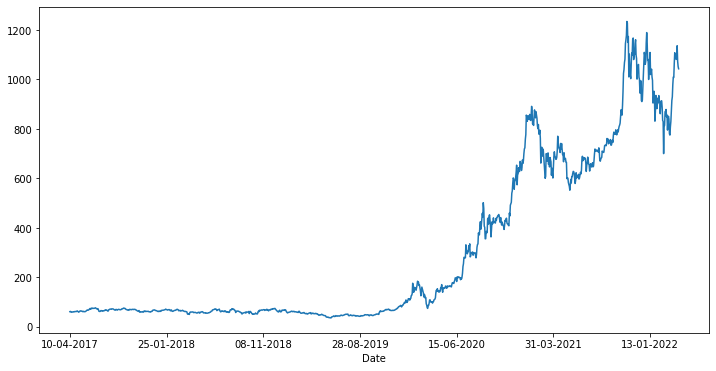

In [ ]:
# Write your code
# Ans(b)--
df_tesla["Open"].plot(figsize = (12,6))

In [ ]:
# Write your code
# Ans(c)--
df_tesla["Open:10 days rolling"] = df_tesla["Open"].rolling(window=10, min_periods=1).mean()

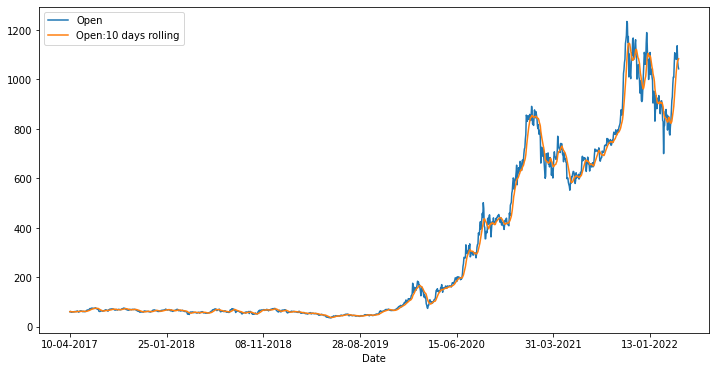

In [ ]:
# Write your code
df_tesla[["Open", "Open:10 days rolling"]].plot(figsize=(12,6))

## Exercise 3
(a)- Plot different type of rolling for smoothening the graph and see the trend of tesla?

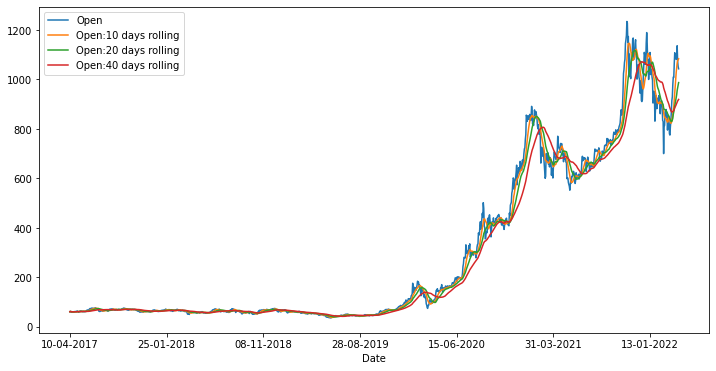

In [ ]:
df_tesla["Open:10 days rolling"] = df_tesla["Open"].rolling(window=10, min_periods=1).mean()
df_tesla["Open:20 days rolling"] = df_tesla["Open"].rolling(window=20, min_periods=1).mean()
df_tesla["Open:40 days rolling"] = df_tesla["Open"].rolling(window=40, min_periods=1).mean()
df_tesla[["Open", "Open:10 days rolling","Open:20 days rolling","Open:40 days rolling"]].plot(figsize=(12,6))

### The SMA's weakness is that it is slower to respond to rapid price changes that often occur at market reversal points.

## Exercise 4
(a)- What is cumulative moving average?
(b)- Try to plot a graph with the hepl of CMA and see the smoothening behaviour?

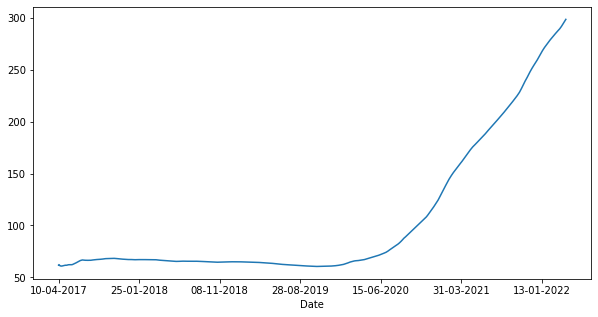

In [ ]:
## Write your code
## Ans(a)--
## The Cumulative Moving Average is the unweighted mean of the previous values up to the current time t. The simple moving average has a sliding window of constant size M. 
## On the contrary, the window size becomes larger as the time passes when computing the cumulative moving average.

## Ans(b)-- Use expanding function.
df_tesla["Open"].expanding().mean().plot(figsize = (10,5))



#df_tesla["EMA_0.1"] = df_tesla["Open"].ewm(alpha=0.1, adjust=False).mean()
#df_tesla[["Open","EMA_0.1"]].plot(figsize = (10,5))

##Exercise 5
(a)- What is Exponential Moving Average?
(b)- Write the code to show the EMA?

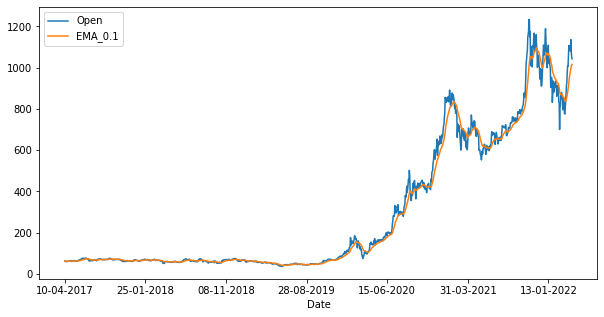

In [ ]:
## Write your code
## What is EMA in machine learning?
##Exponential Moving Average (EMA) is similar to Simple Moving Average (SMA), measuring trend direction over a period of time.
##However, whereas SMA simply calculates an average of price data, EMA applies more weight to data that is more current.

df_tesla["EMA_0.1"] = df_tesla["Open"].ewm(alpha=0.1, adjust=False).mean()
df_tesla[["Open","EMA_0.1"]].plot(figsize = (10,5))

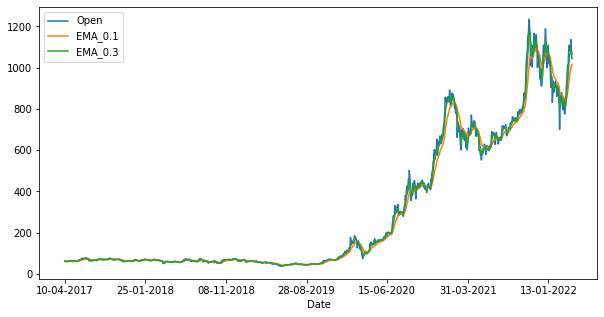

In [ ]:
df_tesla["EMA_0.3"] = df_tesla["Open"].ewm(alpha=0.3, adjust=False).mean()
df_tesla[["Open","EMA_0.1","EMA_0.3"]].plot(figsize = (10,5))